<a href="https://colab.research.google.com/github/AnkitVerma002/Data-Science-Capstone-Project/blob/main/Capstone_Project_Graphical_Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Graphical Analysis of Car_Details dataset.***

In this I am going to use updated dataset of Car Details which I have already updated in Data Cleaning , Data Preprocessing File.

In terms of Updation, I have done the following:

Handling duplicated and missing Values.

Removing Outliers.

Feture Engineering where I have extracted brand names of the car from their names.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Dataset
car_ga = pd.read_csv('/content/car_updated.csv')
car_ga

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,0,Maruti 800 AC,2007,60000.0,70000,Petrol,Individual,Manual,First Owner,Maruti
1,1,Maruti Wagon R LXI Minor,2007,135000.0,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2,Hyundai Verna 1.6 SX,2012,600000.0,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,3,Datsun RediGO T Option,2017,250000.0,46000,Petrol,Individual,Manual,First Owner,Datsun
4,4,Honda Amaze VX i-DTEC,2014,450000.0,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...,...
3383,4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3384,4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3385,4337,Maruti 800 AC BSIII,2009,110000.0,83000,Petrol,Individual,Manual,Second Owner,Maruti
3386,4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [4]:
# showing first 5 rows
car_ga.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,0,Maruti 800 AC,2007,60000.0,70000,Petrol,Individual,Manual,First Owner,Maruti
1,1,Maruti Wagon R LXI Minor,2007,135000.0,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2,Hyundai Verna 1.6 SX,2012,600000.0,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,3,Datsun RediGO T Option,2017,250000.0,46000,Petrol,Individual,Manual,First Owner,Datsun
4,4,Honda Amaze VX i-DTEC,2014,450000.0,141000,Diesel,Individual,Manual,Second Owner,Honda


In [5]:
# showing last 5 rows
car_ga.tail()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
3383,4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3384,4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3385,4337,Maruti 800 AC BSIII,2009,110000.0,83000,Petrol,Individual,Manual,Second Owner,Maruti
3386,4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000,Diesel,Individual,Manual,First Owner,Hyundai
3387,4339,Renault KWID RXT,2016,225000.0,40000,Petrol,Individual,Manual,First Owner,Renault


In [6]:
# showing Dimensions of Dataset
car_ga.shape

(3388, 10)

**Observation :**

This shows we have 3388 rows and 10 columns in the dataset

In [7]:
# checking for columns
car_ga.columns

Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'brand'],
      dtype='object')

As we can see there is one unnecessary column in the dataset i.e.. 'Unnamed: 0'. which is nothing but just a index number of the values. So, we will drop this column from the dataset

In [8]:
# Dropping 'Unnamed: 0' column
car_ga = car_ga.drop('Unnamed: 0', axis=1)
car_ga

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000.0,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000.0,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000.0,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000.0,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000.0,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
3383,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3384,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000,Diesel,Individual,Manual,Second Owner,Hyundai
3385,Maruti 800 AC BSIII,2009,110000.0,83000,Petrol,Individual,Manual,Second Owner,Maruti
3386,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [9]:
# checking for data types
car_ga.dtypes

name              object
year               int64
selling_price    float64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
brand             object
dtype: object

In [10]:
# checking for duplicated values
car_ga.duplicated().sum()

# no duplicate values found

0

In [11]:
# checking for null values
car_ga.isnull().sum()

# no null values found

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
brand            0
dtype: int64

In [12]:
# showing information about dataset
car_ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3388 non-null   object 
 1   year           3388 non-null   int64  
 2   selling_price  3388 non-null   float64
 3   km_driven      3388 non-null   int64  
 4   fuel           3388 non-null   object 
 5   seller_type    3388 non-null   object 
 6   transmission   3388 non-null   object 
 7   owner          3388 non-null   object 
 8   brand          3388 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 238.3+ KB


In [13]:
# showing Statistical Analysis of the Dataset.
car_ga.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
count,3388,3388.000000,3.388000e+03,3388.000000,3388,3388,3388,3388,3388
unique,1381,NaN,NaN,NaN,5,3,2,5,22
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Petrol,Individual,Manual,First Owner,Maruti
freq,54,NaN,NaN,NaN,1695,2718,3194,2060,1072
mean,NaN,2012.780106,3.873584e+05,70471.311688,NaN,NaN,NaN,NaN,NaN
std,NaN,4.252969,2.467862e+05,47723.746361,NaN,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,1.950000e+05,39973.750000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,3.250000e+05,64055.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,5.500000e+05,90000.000000,NaN,NaN,NaN,NaN,NaN


# ***Unique Values of Features***

In [14]:
# Showing Unique values of year column
car_ga['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2013, 2018, 2011, 2010, 2009,
       2019, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [15]:
# showing Unique values of selling_price column
car_ga['selling_price'].unique()

array([  60000.,  135000.,  600000.,  250000.,  450000.,  140000.,
        550000.,  240000.,  850000.,  365000.,  260000.,  585000.,
        390000.,  975000.,  930000.,  525000.,  900000.,  229999.,
        625000., 1050000.,  560000.,  290000.,  275000.,  411000.,
        150000.,  500000.,  100000.,  725000.,  401000.,  750000.,
        310000.,  665000.,  465000.,  160000.,  675000.,  300000.,
         70000.,  151000.,  280000.,  350000.,  570000.,  125000.,
        130000.,  925000.,  200000.,  248000.,   80000.,  650000.,
        495000.,  371000., 1025000.,  325000.,  210000., 1150000.,
        175000.,  628000.,  399000.,  315000.,  780000.,  434000.,
        690000.,  555000.,  120000.,  165000.,   95000.,  800000.,
        840000.,  490000.,  400000., 1000000.,  530000.,   40000.,
         75000.,  540000.,  700000.,  430000.,   65000.,  195000.,
        170000.,  225000.,   99000.,  620000.,  320000.,  810000.,
        282000.,   72000.,  640000.,  380000.,  434999.,  1900

In [16]:
# showing unique values of km_driven column
car_ga['km_driven'].unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,  33000,   4500,  14500,  15000, 130400,
       119000,  40000,  74000,  64000, 120000,  79000,  80000,  18500,
        10200,  29000,  28000,  90000,  73300,  92000,  66764, 350000,
       230000,  31000,  39000, 166000, 110000,  54000,  63000,  76000,
        11958,  20000,   9000,  58000,  62200,  53000,  63500,  29173,
        30000,  87000,  16000,  79350,  81000,   3600,  14272,  49213,
        57000,   3240,   5000,  10000, 114000,  53772, 140000, 175000,
        36000, 155500,  23000,  22155,  78380, 150000,  80362,  55000,
         1136,  43000,   2650, 115962,  65000,  56000, 213000, 139000,
       160000, 163000,  32000,  52000,  11240,  66000,  49000,  26500,
        72000,  44000, 130000, 195000, 155000,   4000,  41000,  10832,
        14681,  51000, 200000,  19600,  46730,  21170, 212814,  88635,
       149674,   8000,  68000,  38000,  75000,  98000,  81925,  82080,
      

In [17]:
# showing unique values of categorical columns
cat_cols = [col for col in car_ga.columns if car_ga[col].dtype == 'object']

for col in cat_cols:
  print(car_ga[col].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Skoda' 'Toyota'
 'Mercedes-Benz' 'Mahindra' 'Ford' 'Nissan' 'Renault' 'Fiat' 'Volkswagen'
 'Audi' 'Mitsubishi' 'Daewoo' 'Force' 'OpelCorsa' 'BMW' 'Ambassador']


# ***Data Visualization***

***Histplot for Data***

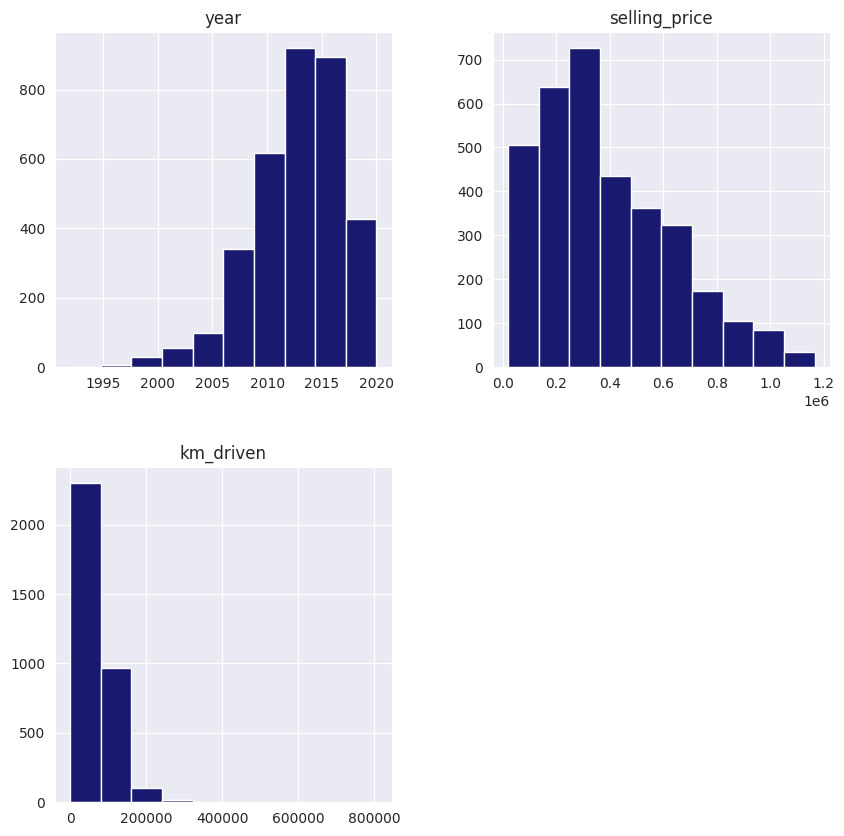

In [18]:
# Showing Histplot
car_ga.hist(figsize=(10,10),color='MidnightBlue')
plt.show()

# ***Feature Wise Visualization***

# ***1. Brand Column***

***Total No. of cars sold by different brands.***

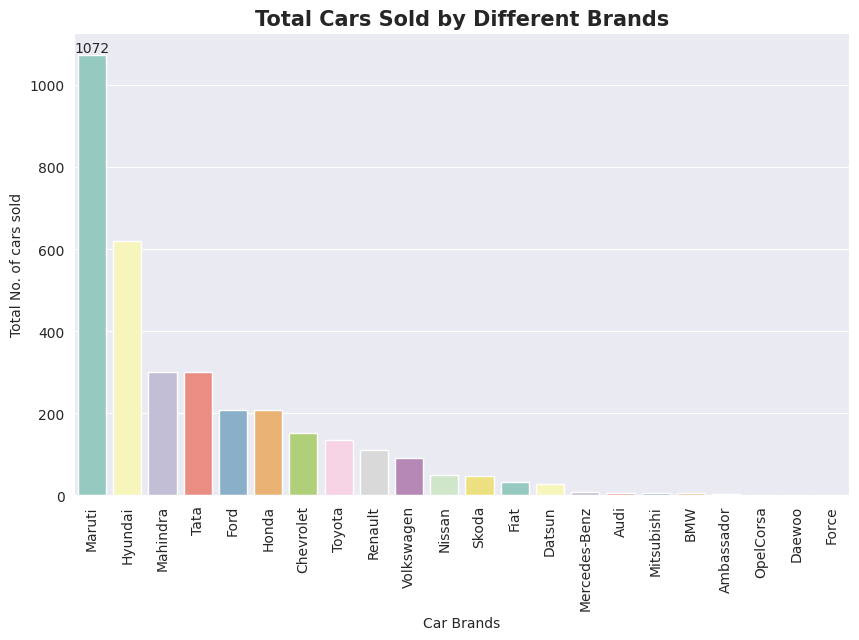

In [19]:
plt.figure(figsize=(10,6))
counts = car_ga["brand"].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=counts.index, y=counts.values,palette="Set3")
ax.bar_label(ax.containers[0], )
plt.xlabel("Car Brands")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars Sold by Different Brands",fontweight="black", fontsize=15)
plt.xticks(rotation=90)
plt.show()

***Insights :***

We can see that Maruti has sold the highest number of cars.

Maruti is the highest preferred brand.

Brands like OpelCorsa, Daewoo and Force are the least preferred brands.

The Top 5 Brands who sold the most number of cars are -

 Maruti

 Hyundai

 Mahindra

 Tata

 Ford

# ***Market share of Top 10 Car Brands***

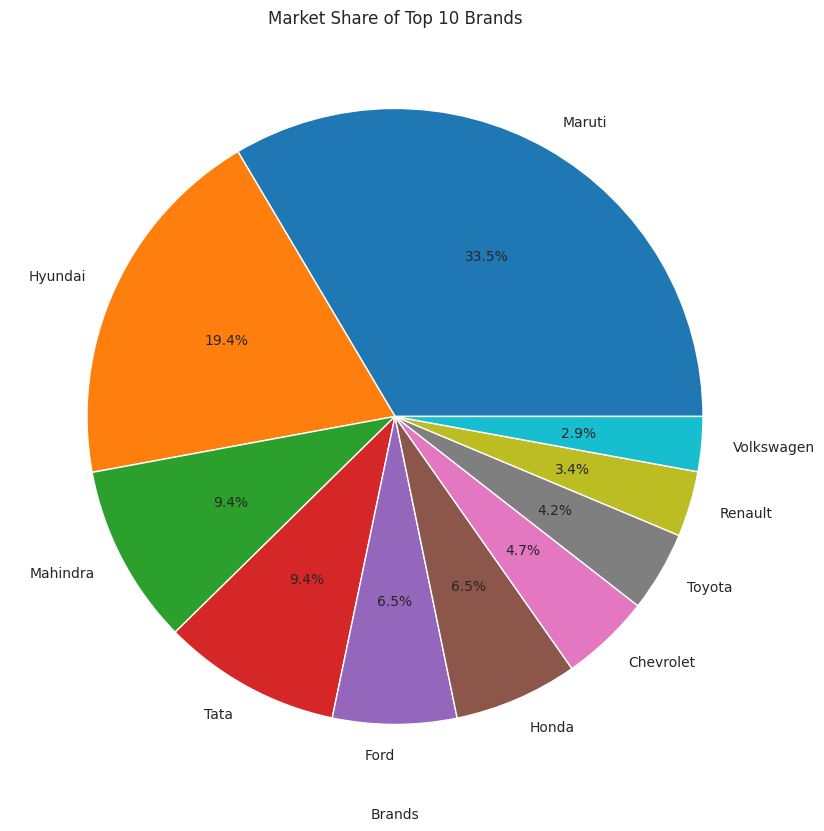

In [20]:
plt.figure(figsize=(12,10))
top_brands = car_ga["brand"].value_counts().sort_values(ascending=False).head(10)
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%')
plt.title("Market Share of Top 10 Brands")
plt.xlabel("Brands")
plt.show()

***Insights :***

Maruti has the highest market share which is about 33.5% of the total.

Out of these Top 10 brands, Volkswagen has the lowest market share which is about 2.9% of the total.

# ***Average Selling Price of each Car Brand***

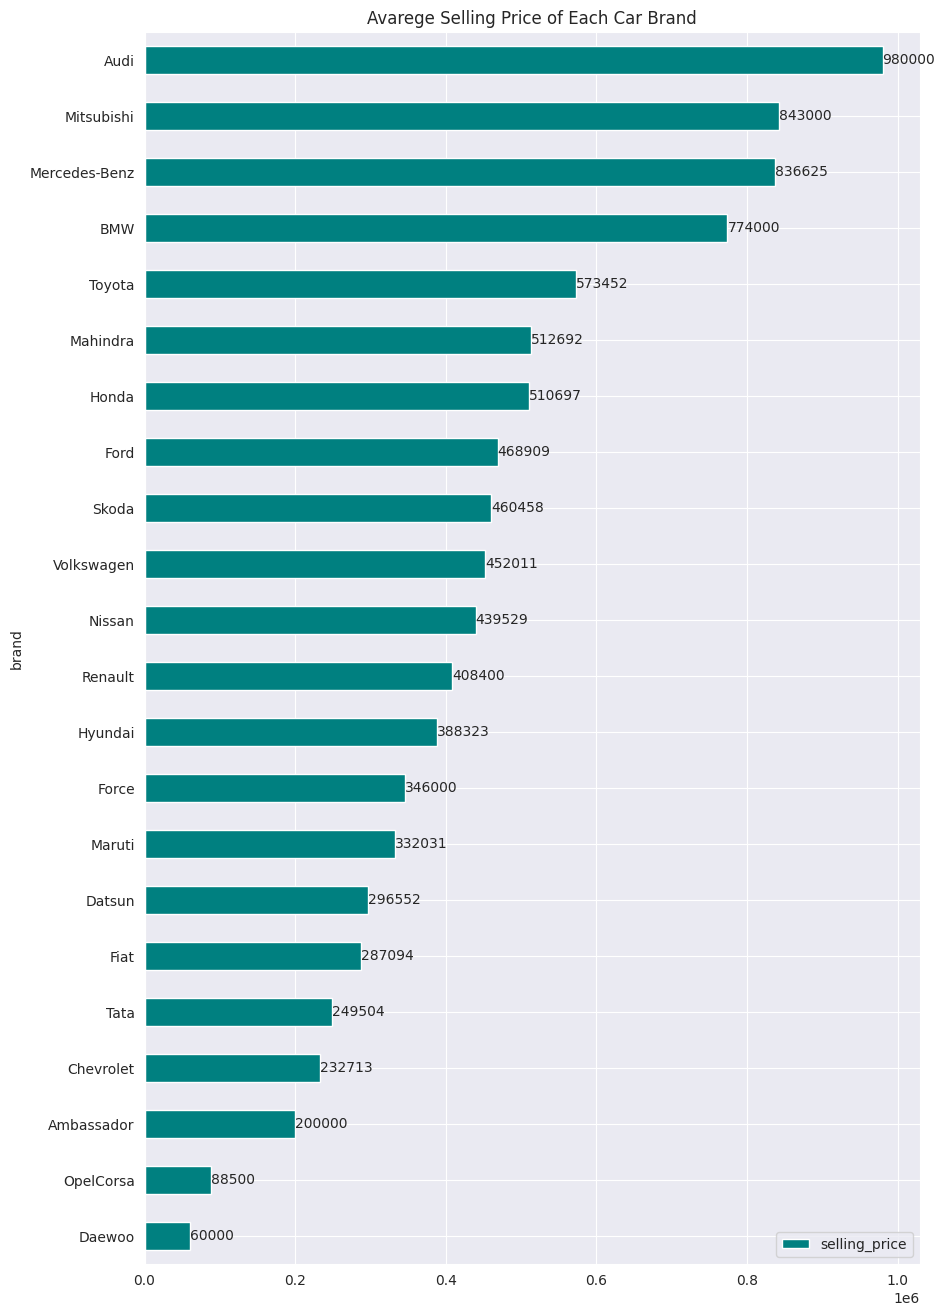

In [21]:
avg_car_price = car_ga.groupby(['brand'])[['selling_price']].mean()
avg_car_price.sort_values(by='selling_price', ascending=True, inplace=True)
ax   = avg_car_price.plot(kind='barh', color='teal' , figsize=(10,16) ,title= 'Avarege Selling Price of Each Car Brand')
ax.bar_label(ax.containers[0], )
plt.show()

***Insights :***

We can clearly see Audi is one of the highest price car brand.

# ***Average km driven of each Car Brand***

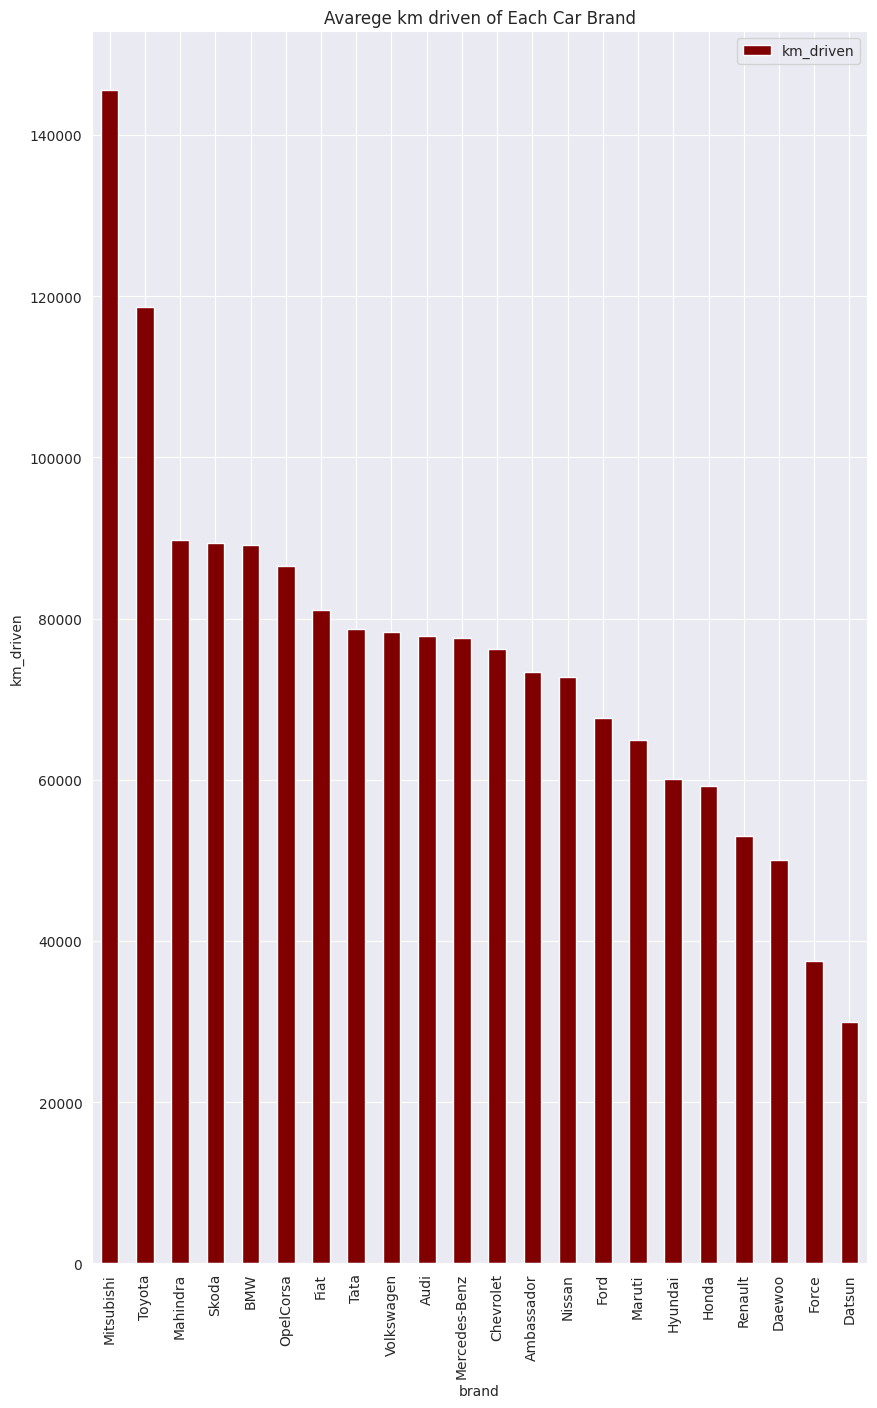

In [22]:
avg_km_driven = car_ga.groupby(['brand'])[['km_driven']].mean()
avg_km_driven.sort_values(by='km_driven', ascending=False, inplace=True)
ax   = avg_km_driven.plot(kind='bar', color='#800000' , figsize=(10,16) ,title= 'Avarege km driven of Each Car Brand')
plt.ylabel('km_driven')
plt.show()

***Insights:***

From the plot we can see that the Mitsubishi car brand has the highest average km driven.

The Toyota brand also has the high average km driven.

The Datsun car brand has the lowest average km driven.

# ***Distribution of each Car Brand on the basis of transmission.***

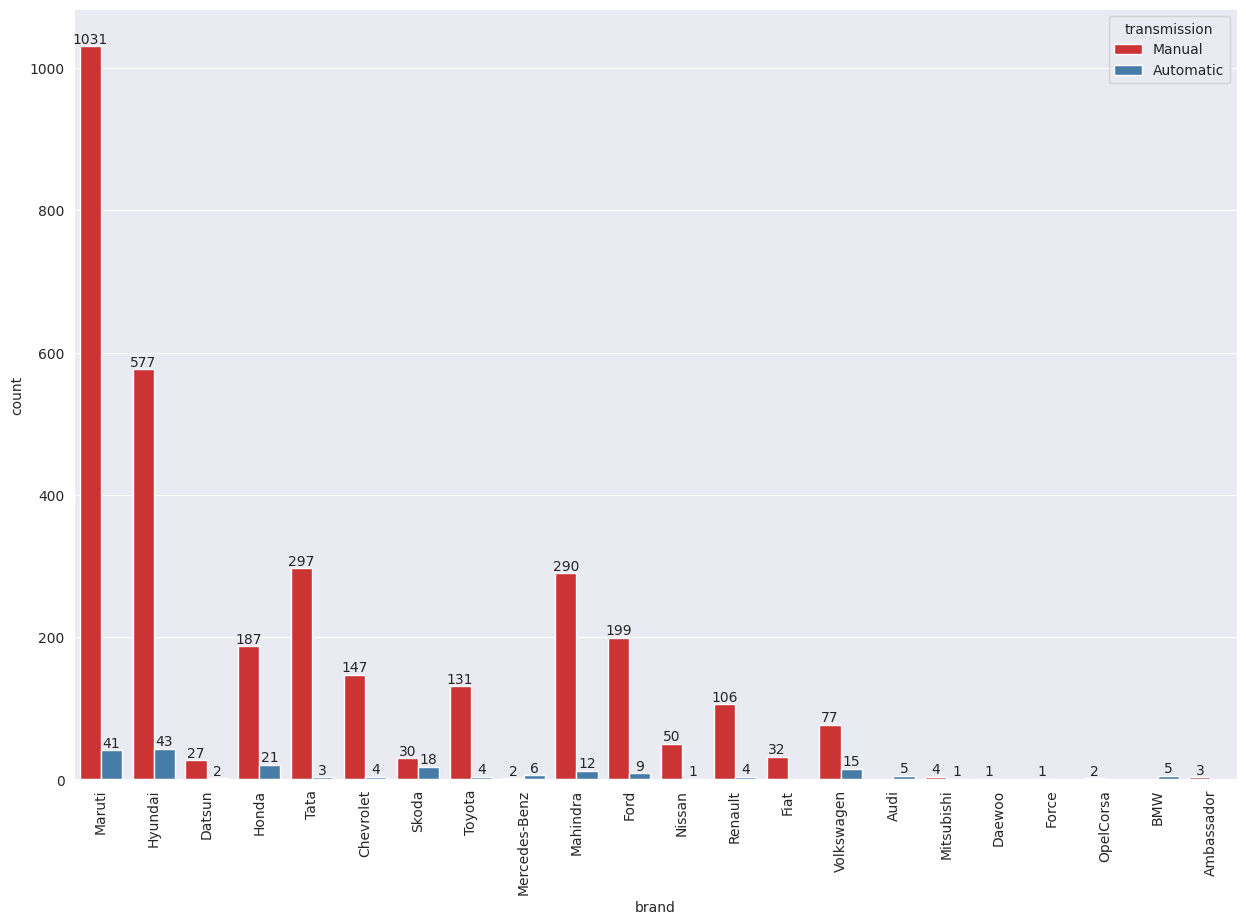

In [23]:
plt.figure(figsize=(15,10))
car_count = sns.countplot(x='brand', data=car_ga, palette="Set1",hue='transmission')
# Display labels on the bars
for container in car_count.containers:
    car_count.bar_label(container)
plt.xticks(rotation=90)
plt.show()

***Insights :***

In terms of Manual Transmission, Maruti has the most no. of cars.

In terms of Automatic Transmission, Hyundai leads than other car brands

# ***2. Name Column***

***Top 15 cars sold most no. of times.***

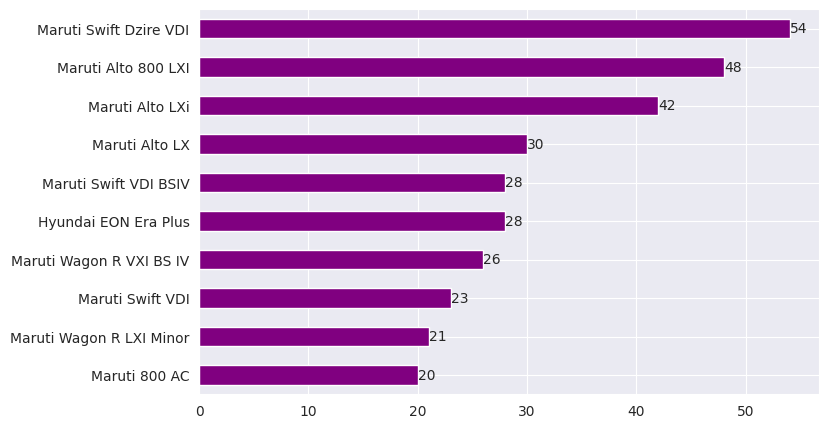

In [24]:
most_sold_cars = car_ga['name'].value_counts().head(10).sort_values().plot(kind='barh', figsize=(8,5), color='purple')
most_sold_cars.bar_label(most_sold_cars.containers[0], )
plt.show()

***Insights :***

Maruti Swift Dzire VDI sold the most number of times.

The Top 5 cars sold the most number of times are -

 Maruti Swift Dzire VDI

 Maruti Alto 800 LXI

Maruti Alto LXi

Maruti Alto LX

Maruti Swift VDI BSIV

# ***3. Year Column***

***Total of Cars Sold Each Year***

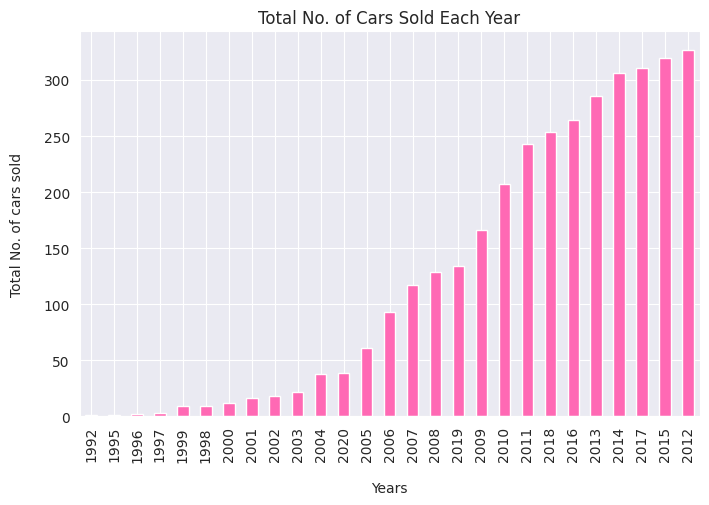

In [25]:
cars_sold_yearly = car_ga['year'].value_counts().sort_values().plot(kind='bar', figsize=(8,5), color='hotpink')
plt.xlabel("Years", labelpad=14)
plt.ylabel("Total No. of cars sold", labelpad=14)
plt.title("Total No. of Cars Sold Each Year")
plt.xticks(rotation=90)
plt.show()

***Insights:***

The Highest number of cars sold in 2012
Other than 2012, [2013, 2014, 2016, 2017, 2018] are the other years in which the cars sold in high numbers.

The lowest number of cars sold in 1992

# ***Selling of Car Each Year Transmission Wise***

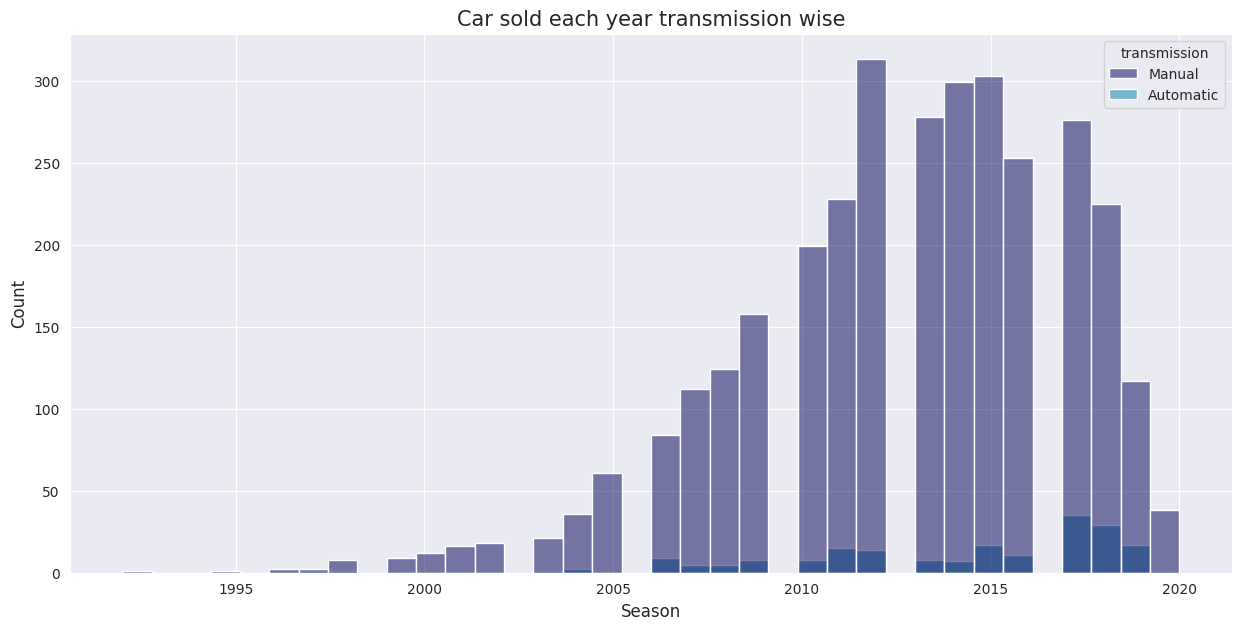

In [26]:
plt.figure(figsize=(15,7))
sns.histplot(x='year',
              hue='transmission',
              data=car_ga,
              palette='ocean')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Car sold each year transmission wise', fontsize=15)
plt.show()

***Insights :***

In 2012, Manual Transmission cars sold the most.

We can see the years between 2011 and 2018 are the most sold years for manual transmission cars.

In 2017, Automatic Transmission cars sold the Highest.

The Year 2017, 2018, and 2019 are the most sold years for automatic transmission cars

# ***How does year affects km_driven?***

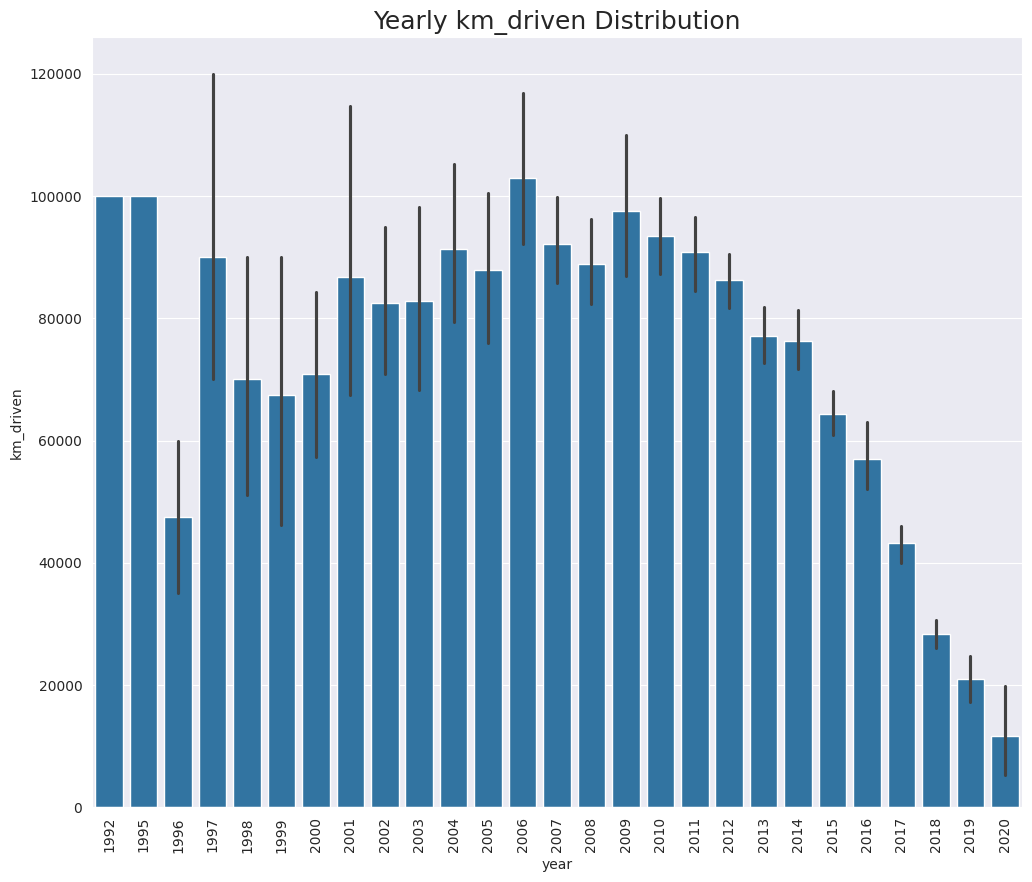

In [27]:
plt.figure(figsize=(12,10))
plt.title('Yearly km_driven Distribution', fontsize=18)
sns.barplot(data=car_ga, x='year', y='km_driven')
plt.xticks(rotation=90)
plt.show()

***Insights:***

From the plot we can see that in year 1997 the most km_driven cars are sold.

In year 2020, the least km_driven cars are sold.

# ***4. Visualizaion of Categorical Features.***

In [29]:
# Defining function to plot graph

def categorical_visualization(cols):
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=car_ga,palette="flag",order=car_ga[cols].value_counts().index)
    plt.title(f"{cols} Distribution",fontweight="black",fontsize=15)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="selling_price",data=car_ga,palette="flag")
    plt.title(f"{cols} vs Price",fontweight="black",fontsize=15)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(car_ga.groupby(cols)["selling_price"].mean().sort_values(ascending=False))
    sns.pointplot(x=x.index,y="selling_price",data=x,palette="flag")
    plt.title(f"{cols} vs Average Price",fontweight="black",fontsize=15)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

***Fuel Column***

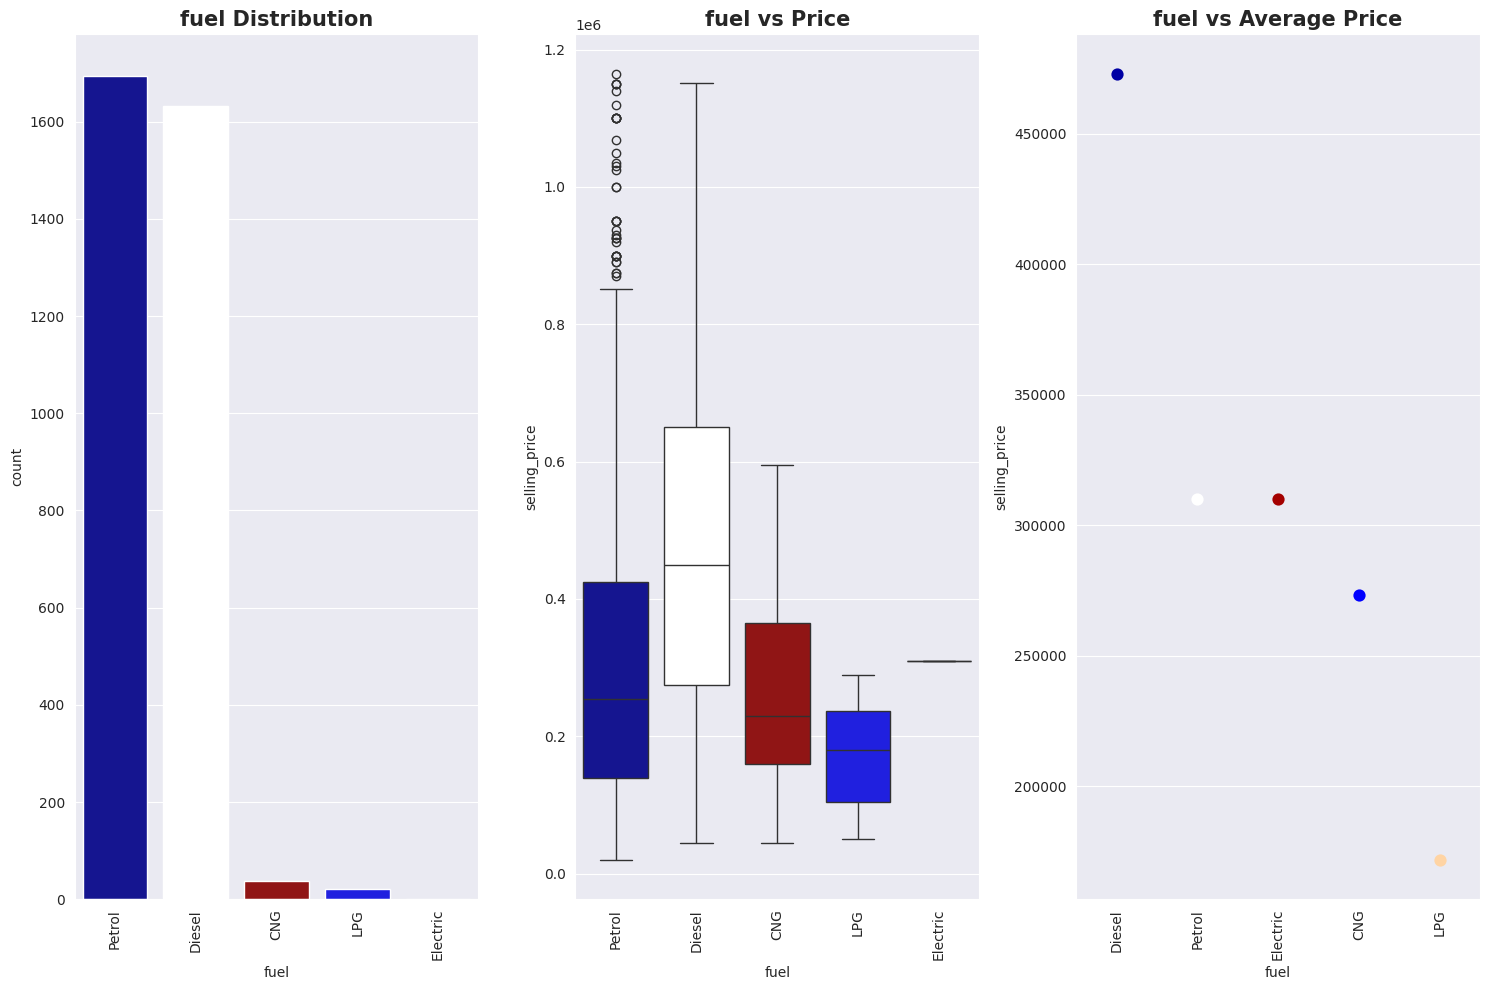

In [30]:
categorical_visualization('fuel')

***Insights :***

From the First Plot, We can clearly see that Cars having Petrol fuel system is mostly sold and having electric cars is least sold.

From the second plot we can make an insight that Petrol Fuel Sysytem cars are availabe within every price range.

Diesel fuel type are having most of the cars price near to average price of the cars. But the Petrol Fuel Type cars are having cars with high prices also.

From the third plot we can make an insight that the Average price of diesel fuel type cars are more than other fuel type cars.

So we can say that customers prefer those cars which consumes less price in fuels.

***Seller_Type Column***

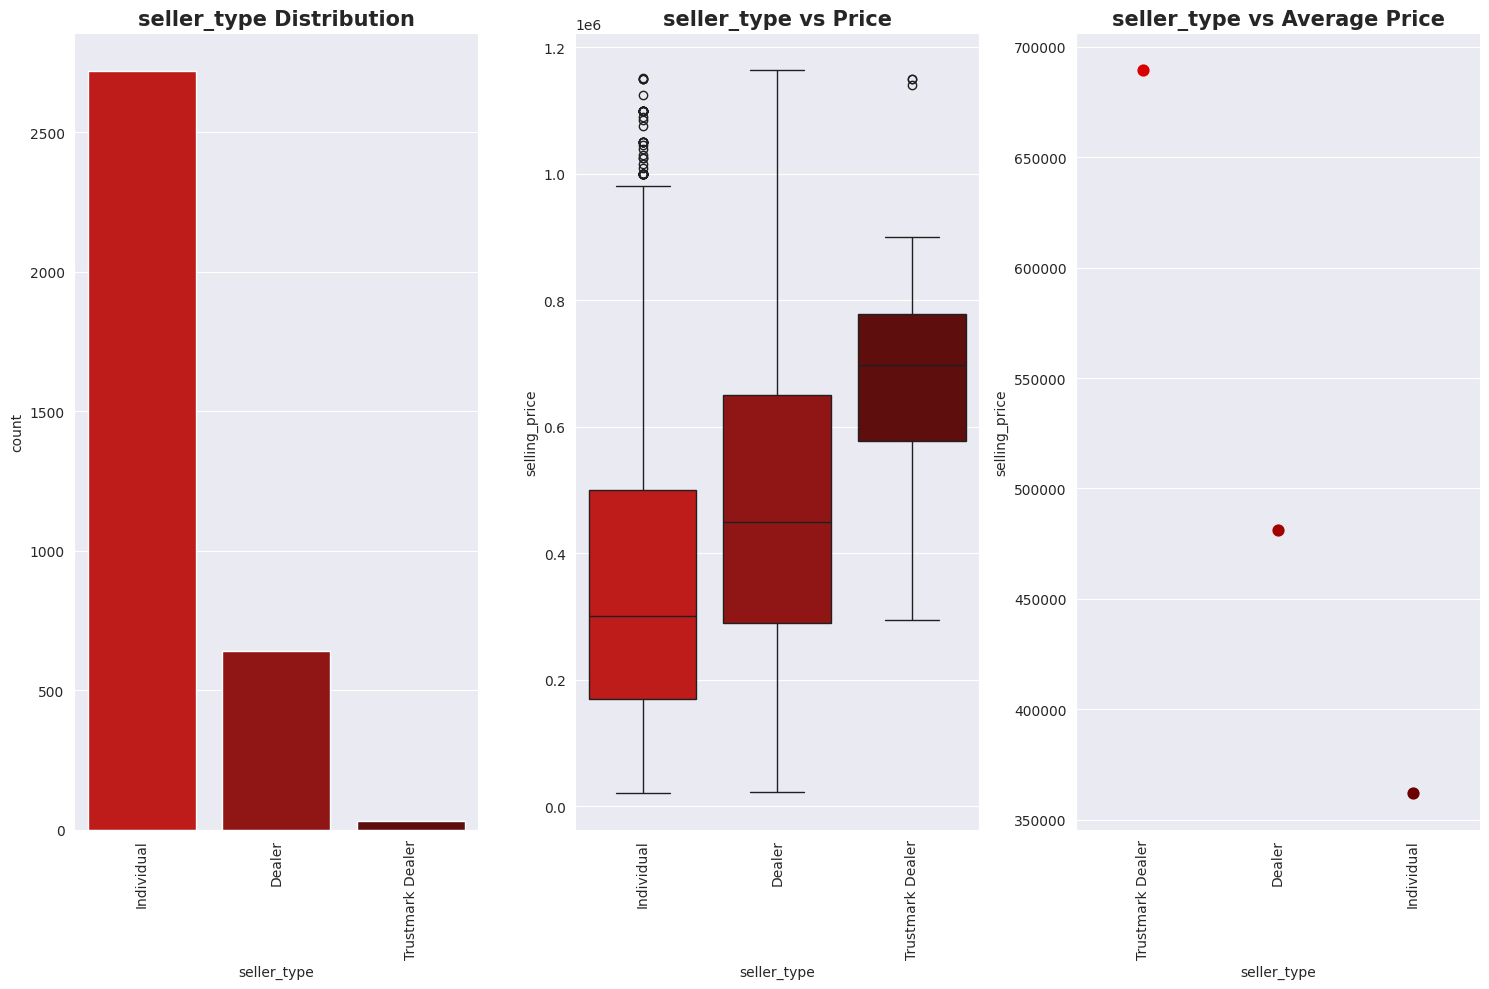

In [31]:
categorical_visualization('seller_type')

***Insights :***

From the First Plot, We can clearly see that Individuals seller type sold the most no. of cars.

From the second plot we can make an insight that both the individuals and dealers seller type sold the car in every price range.But, the trustmark dealers mostly deal in high price cars.

Individuals seller type car's average price is very low so, we can conclude this that most of the people prefer individuals seller type cars.

# ***Transmission Column***

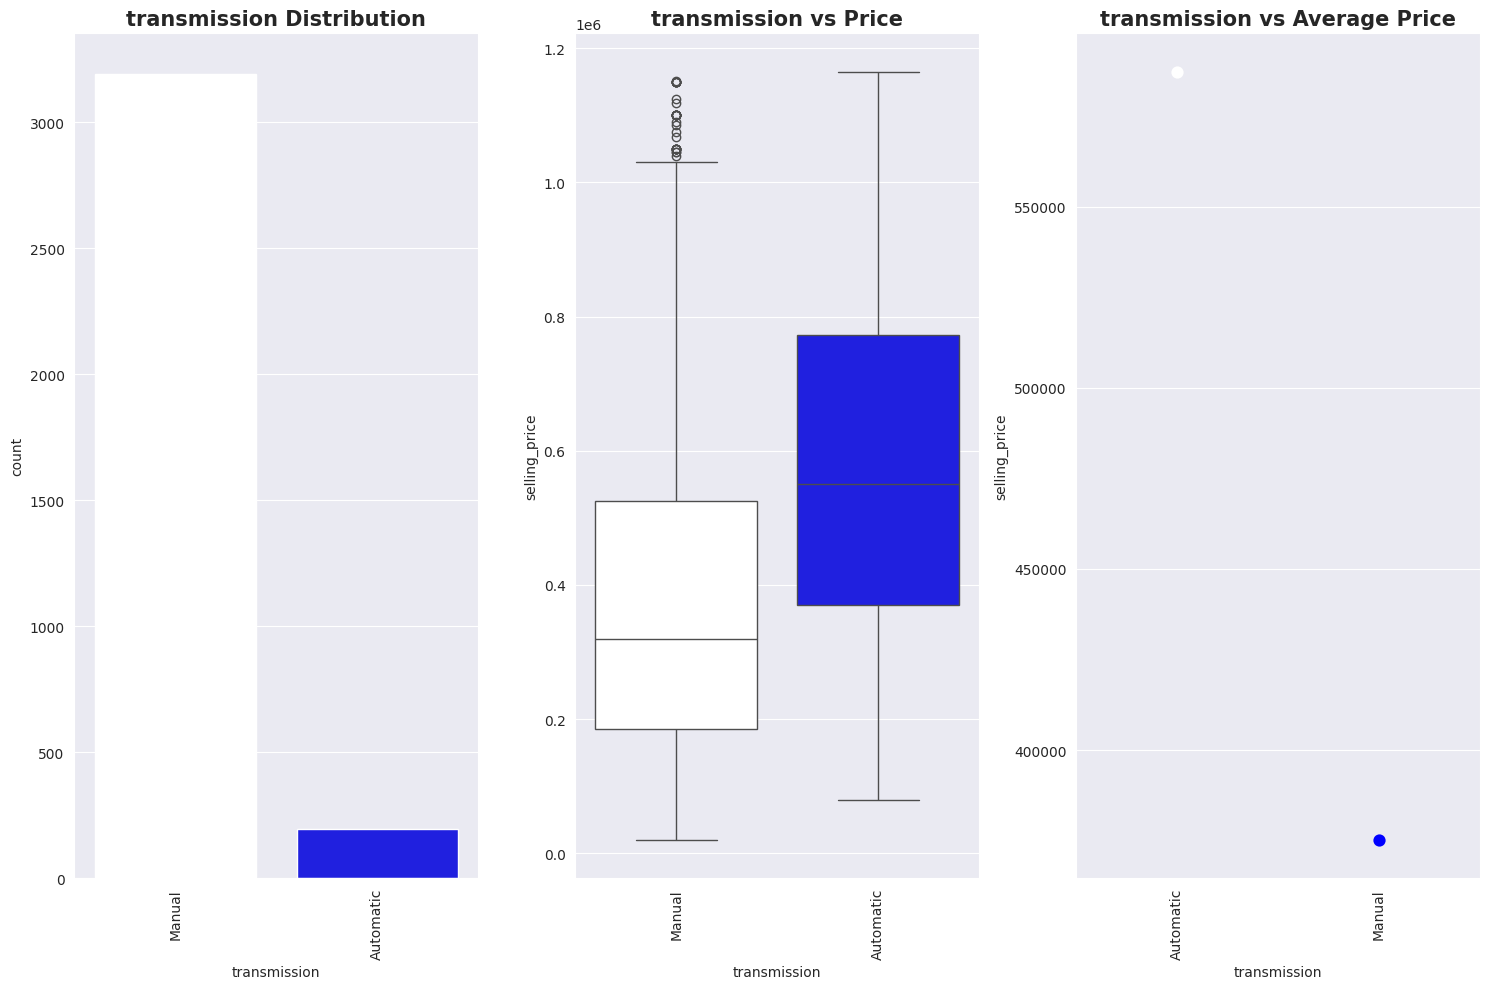

In [32]:
categorical_visualization('transmission')

***Insights:***

From the First Plot, We can clearly see that Manual Transmission cars sold the most.

From the second plot we can make an insight that Manual type cars are availabe within every price range whereas Automatic type cars are deal with high prices cars.

Manual type cars are having most of the cars price near to average price of the cars.but, the manual type cars having very low average price.

So we can say that customers mostly prefer manual type cars

# ***Owner Column***

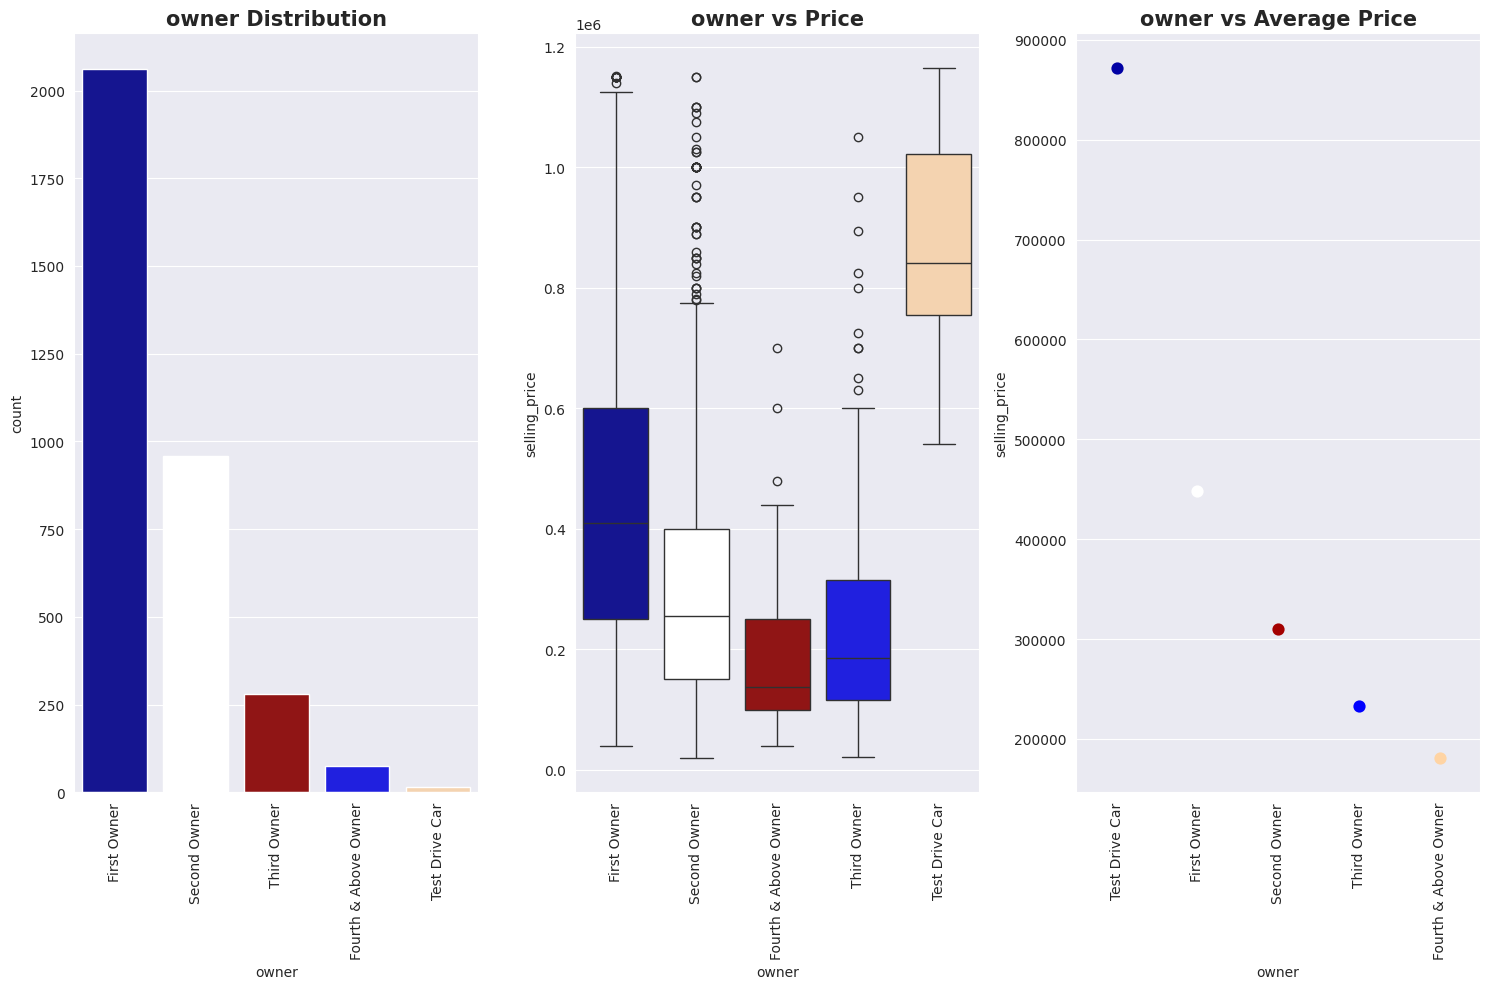

In [33]:
categorical_visualization('owner')

***Insights :***

From the First Plot, We can clearly see that Cars are mostly sold to the first owners.

From the second plot we can make an insight that second type owner are mostly deal with every price range.

Test drive car owners mostly take high price carsas there average price is even higher than other owners.

So, we can conclude that cars are mostly sold to first and second owners.

# ***5. Km_driven Column***

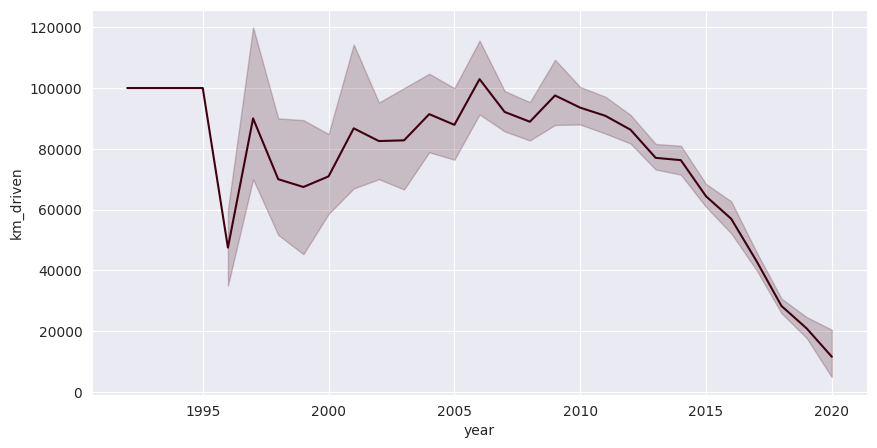

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x = car_ga['year'], y =car_ga['km_driven'],color='#3F000F')
plt.show()

***Insight:***

We can clearly see with the year the km_driven of the cars keeps on decreasing.

# ***6. Transmission Column***

***Relationship between Transmission and Selling price on the basis of seller type.***

<Figure size 500x500 with 0 Axes>

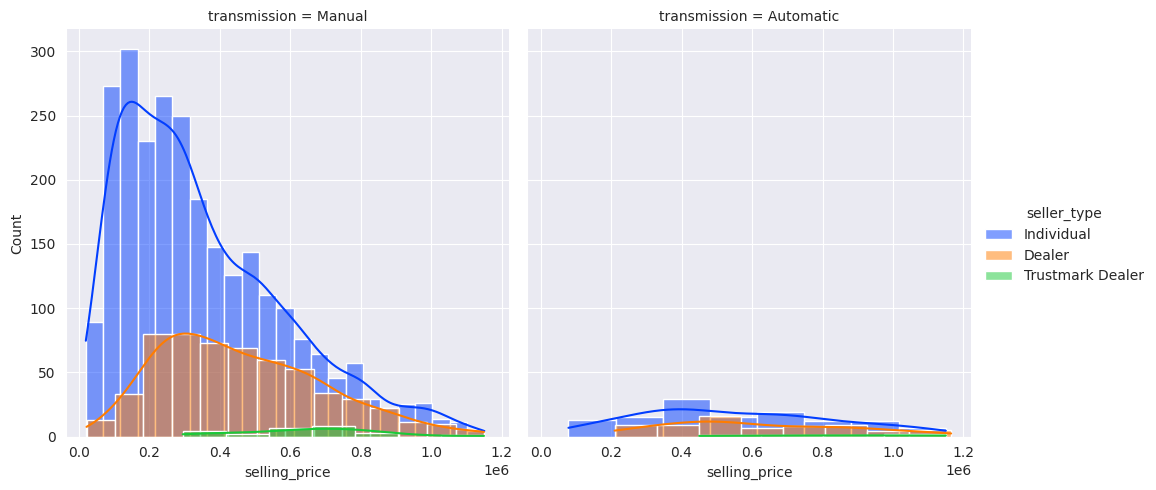

In [35]:
plt.figure(figsize=(5,5))
g = sns.FacetGrid(car_ga, col="transmission", hue="seller_type", palette="bright",height=5)
g = (g.map(sns.histplot, "selling_price", kde=True).add_legend())
plt.show()


***Insights:***

When Transmission is Manual, Individual seller type deal with lower price cars.

When Transmission is Manual, Dealers seller type deal with all price ranges.

When Transmission is manual, Trustmark dealers mostly deal with high price cars.

When Transmission is Automatic, Trustmark dealers mostly deal with high price cars.

When Transmission is Automatic, Individuals seller type deal high prices camparitively manual car types.

When Transmission is Automatic, Dealers seller type deal with high price cars comparatively manual car types.

# ***7. Visualizing Target Feature (selling_price)***

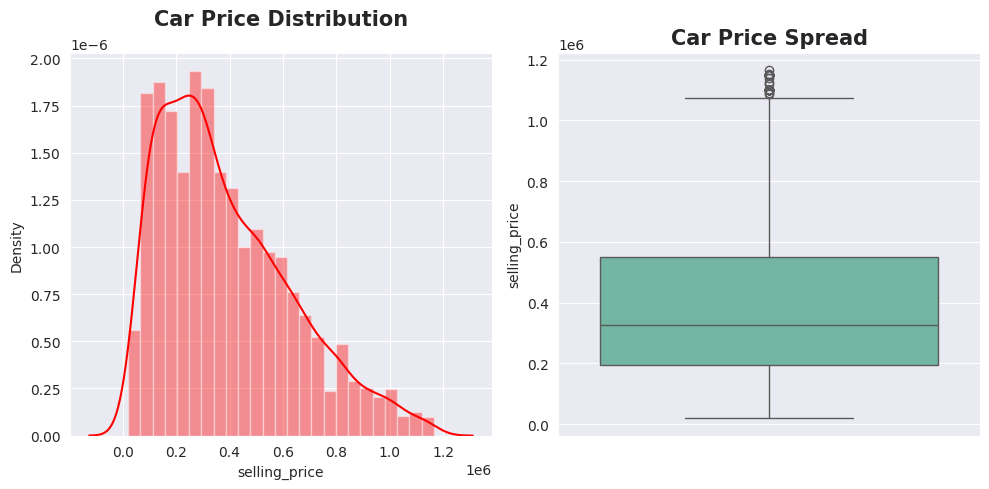

In [36]:
# Showing Car Price Distribution plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(car_ga["selling_price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=15)

# Showing Car Price Spread plot
plt.subplot(1,2,2)
sns.boxplot(y=car_ga["selling_price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",fontsize=15)
plt.tight_layout()
plt.show()

***Insights :***

We can clearly observe that our Car Price Feature is Slightly Rightly Skewed Distribution.

We can clearly observe that there is a significant difference between mean & median value.

# ***Relationship Between Selling Price and Year on the basis of fuel.***

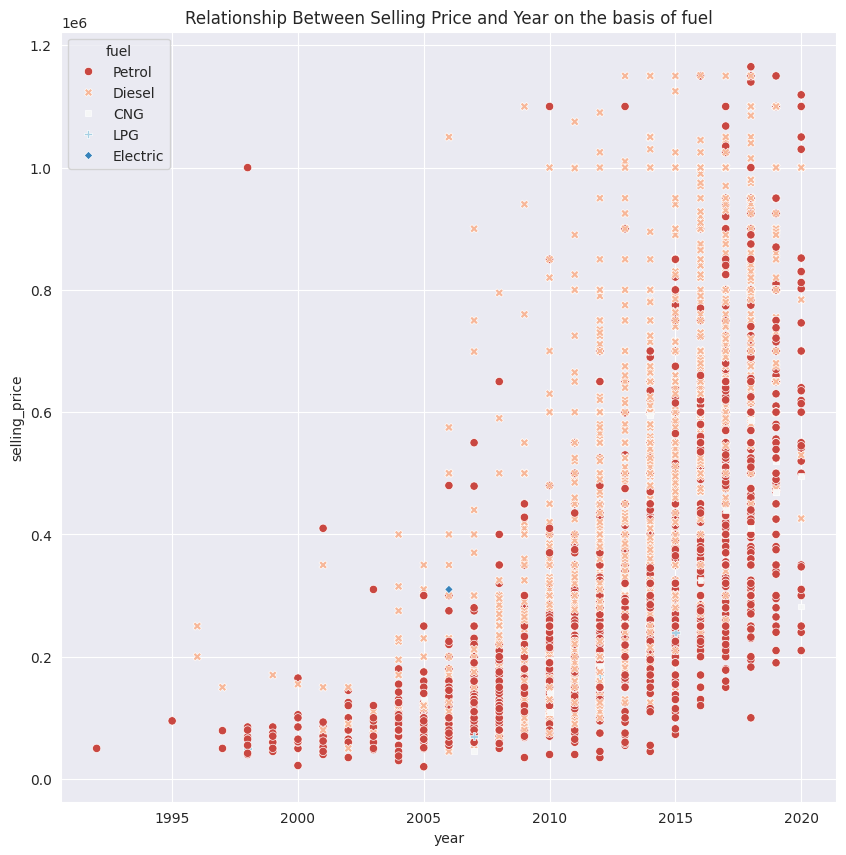

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=car_ga, x='year', y='selling_price', hue='fuel', style='fuel',palette='RdBu')
plt.title('Relationship Between Selling Price and Year on the basis of fuel')
plt.show()

***Insight:***

With the increase in the year the selling price of the diesel cars keeps on increasing, But in 2020 the selling price of cars having petrol fuel type is high.

# ***Relationship Between Selling Price and Year on the basis of transmission.***

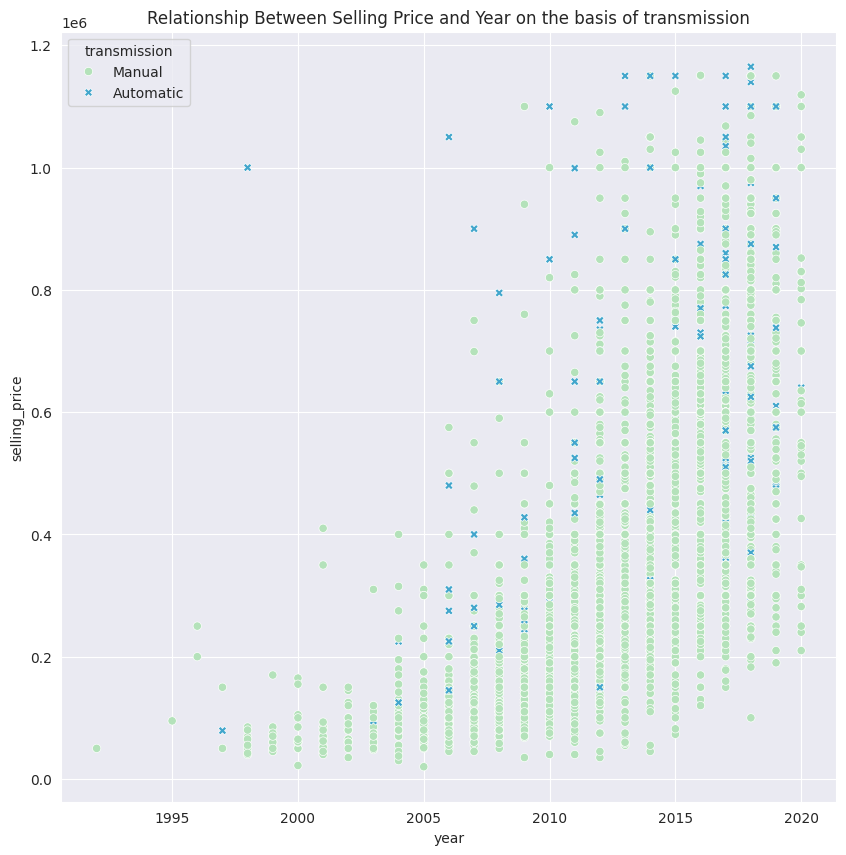

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=car_ga, x='year', y='selling_price', hue='transmission', style='transmission',palette='GnBu')
plt.title('Relationship Between Selling Price and Year on the basis of transmission')
plt.show()

***Insight:***

With the increase in the year the selling price of the manual type cars keeps on increasing.

# ***Plotting Correlation Plot***

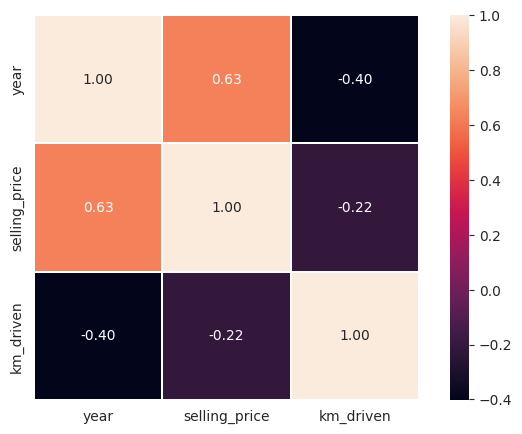

In [39]:
# Plotting a Heatmap for correlation using correlation table
fig, axes = plt.subplots(figsize=(8,5))
sns.heatmap(car_ga.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

***Insight:***

from this plot we can see that year are selling price are highly positively correlated

But, year and km_driven are highly negatively correlated

# ***Plotting Pairplot***

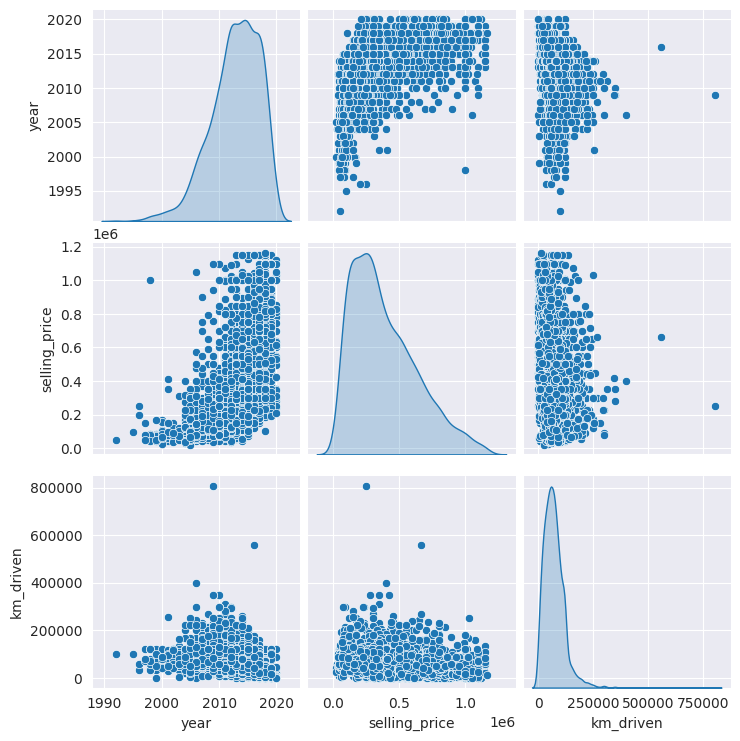

In [40]:
sns.pairplot(car_ga,kind='scatter',diag_kind='kde')
plt.show()

# ***Conclusion***

Here I have used the updated car dataset which is taken from the car details dataset from kaggle. Before applying Visualization , first i updated the dataset like perform some data cleaning , outliers removal and then i visualized the dataset using different visualization techniques(matplotlib and seaborn). I have used various plots in this like barplot, histplot, scatterplot, boxplot and many more.I also used correlation plot to check the correlation between different features, where I have found that With the increase in the year the selling price keeps on increasing , but the km_driven keeps on decreasing. I have also used pairplot to check the relationship between different features. From the Analysis I came to know that
the Top 5 Brands who sold the most number of cars are-

1. Maruti, Hyundai, Tata, Ford and Mahindra.
2. Audi is one of the highest price car brand.
3. Mitsubishi car brand has the highest average km driven.
4. In the year 1997 the most km_driven cars are sold.
5. The Top 5 cars sold the most number of times are -
Maruti Swift Dzire VDI, Maruti Alto 800 LXI, Maruti Alto LXi, Maruti Alto LX, Maruti Swift VDI BSIV.
6. In 2012, Manual Transmission cars sold the most.
7. In 2017, Automatic Transmission cars sold the Highest.
8. The Highest number of cars sold in 2012 9. Customers mostly prefer manual type cars. 10. Cars are mostly sold to first and second owners